In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ds.salaries.csv")

In [3]:
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.shape

(607, 12)

In [5]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [7]:
df=df.drop(columns="Unnamed: 0")

In [8]:
df["experience_level"].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='employment_type', ylabel='count'>

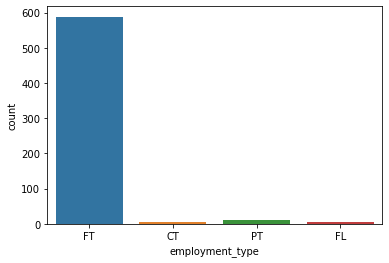

In [9]:
import seaborn as sns
sns.countplot(df["employment_type"])

In [10]:
df["job_title"].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='company_size', ylabel='count'>

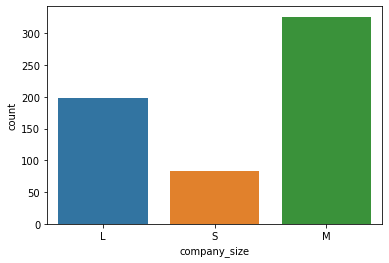

In [11]:
sns.countplot(df["company_size"])

In [13]:
df["work_year"].value_counts()

2022    318
2021    217
2020     72
Name: work_year, dtype: int64

In [14]:
top_10_comapany_location=top_10_comapany_location[:10]

NameError: name 'top_10_comapany_location' is not defined

In [15]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [16]:
df=df.drop(columns=["salary_currency","salary"])

In [17]:
df.shape

(607, 9)

In [18]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S


In [19]:
df["remote_ratio"].value_counts()

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()
df["experience_level"]=coder.fit_transform(df["experience_level"])
df["employment_type"]= coder.fit_transform(df["employment_type"])
df["job_title"] = coder.fit_transform(df["job_title"])
df["employee_residence"] =coder.fit_transform(df["employee_residence"])
df["company_location"] =coder.fit_transform(df["company_location"])
df["employee_residence"] =coder.fit_transform(df["employee_residence"])
df["company_size"]=coder.fit_transform(df["company_size"])

In [21]:
df.dtypes

work_year             int64
experience_level      int64
employment_type       int64
job_title             int64
salary_in_usd         int64
employee_residence    int64
remote_ratio          int64
company_location      int64
company_size          int64
dtype: object

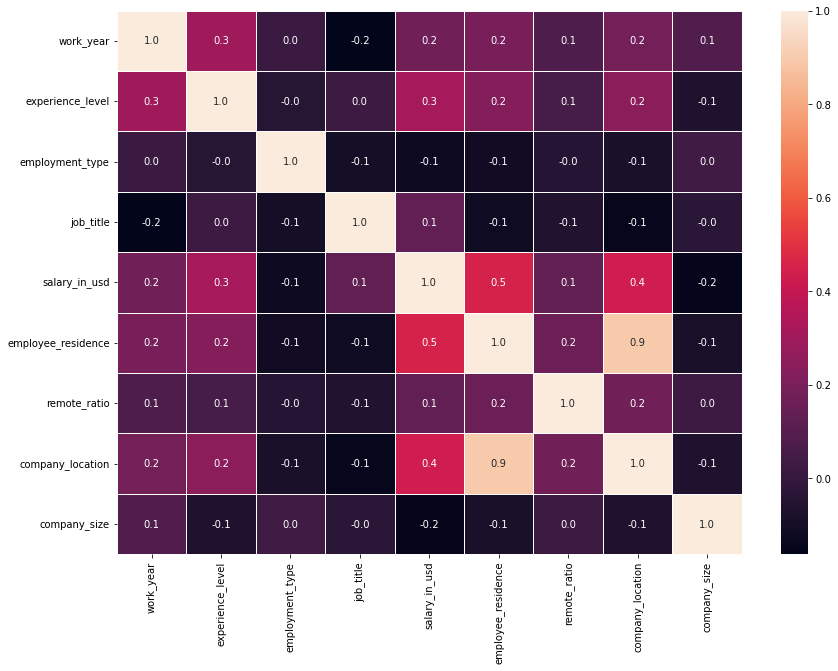

In [22]:
plt.figure(figsize = (14, 10))
sns.heatmap(df.corr(), annot = True, fmt = ".1f", linewidths = .7)
plt.show()

In [23]:

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
x=df.drop(columns="salary_in_usd")
y=df["salary_in_usd"]
clf.fit(x,y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=x.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
job_title,0.318409
employee_residence,0.139518
experience_level,0.122988
company_location,0.121791
company_size,0.101156
work_year,0.088253
remote_ratio,0.087299
employment_type,0.020586


In [24]:
X=df.drop(columns="salary_in_usd")
y=df["salary_in_usd"]

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , r2_score


models = [LinearRegression(), 
          Ridge(), 
          Lasso(), 
          DecisionTreeRegressor(), 
          RandomForestRegressor()]
model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']

# Evaluate each model
for model, name in zip(models, model_names):
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f'{name}: MSE={mse:.2f}, R2={r2:.2f}')

Linear Regression: MSE=3486992390.32, R2=0.31
Ridge Regression: MSE=3487004113.26, R2=0.31
Lasso Regression: MSE=3486992414.11, R2=0.31
Decision Tree: MSE=553515625.48, R2=0.89
Random Forest: MSE=859273950.15, R2=0.83


In [26]:
print (y_pred)

[ 82384.83       196545.55       100773.56857143  41242.8975
 167359.268       79849.66666667 194945.1         39979.257
 123343.33333333 111527.505       49485.465       36905.57
  44746.02166667 145052.66666667  95979.5         22200.3
  33959.525      108009.03        14645.21        57308.46
  53568.4225      12362.66        64664.64371429 102564.81428571
 105872.65428571 306231.          44947.49        72692.48
  92680.         120530.02        62057.5375      78110.5952381
  69896.08       358449.39666667  50353.07483333  78349.935
 106326.5        200030.          17081.02       146680.
  41408.66        81503.69083333  49170.3725     110074.
  99018.54428571  35937.67        72040.66857143 202579.52380952
 128562.          68940.083       11362.01        79849.66666667
  53092.074       52762.03714286  74490.55172414 150922.57
  43205.55       125853.81547619 162276.97619048 125853.81547619
 110074.         107696.722       28849.01       295848.89833333
  54727.27        5893

In [27]:
print(y)

0       79833
1      260000
2      109024
3       20000
4      150000
        ...  
602    154000
603    126000
604    129000
605    150000
606    200000
Name: salary_in_usd, Length: 607, dtype: int64


In [28]:
from sklearn import metrics
error_score = metrics.r2_score(y,y_pred)
error_score

0.8290559275487933

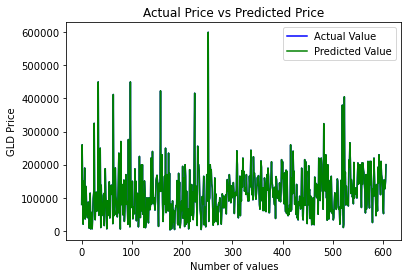

In [29]:
y_pred = list(y)
plt.plot(y, color='blue', label = 'Actual Value')
plt.plot(y_pred, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [36]:
import pickle
filename = 'Data Science Jobs Analysis.sav'
pickle.dump(model, open(filename, 'wb'))

In [38]:
loaded_model = pickle.load(open('Data Science Jobs Analysis.sav', 'rb'))

In [39]:
import numpy as np
input_data = (2020,,2,3,12,50,4,0)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

[66118.48]


/Users/devansh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [33]:
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,2,2,22,79833,14,0,12,0
1,2020,3,2,41,260000,32,0,29,2
2,2020,3,2,7,109024,20,50,18,1
3,2020,2,2,47,20000,23,0,20,2
4,2020,3,2,38,150000,55,50,48,0
...,...,...,...,...,...,...,...,...,...
602,2022,3,2,17,154000,55,100,48,1
603,2022,3,2,17,126000,55,100,48,1
604,2022,3,2,12,129000,55,0,48,1
605,2022,3,2,12,150000,55,100,48,1
